In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in

# Chapter 8: Introduction to Deep Learning for Computer Vision
Supporting materials for:

Chollet (2021). *Deep Learning with Python*. v2 Manning Publications Co. 

Chapter 8 *Introduction to Deep Learning for Computer Vision*

# 8.1 Introduction to convnets

In this chapter we finally begin looking at what makes a the difference between a regular
feed forward neural network and a "deep" neural network.

Chapter 8 introduces convolutional neural networks (referred to as convnets or CNN).  CNN were originally
developed to address complex image-classification problems, and are still some of the best methods
known to build classifiers when working with still image pictures and with moving video models as well,
though their uses as deep learning mechanisms have been consideradbly broadened and applied to many
other tasks as well.

We will start with the simple practical example given in this chapter.  We have seen the MNIST digits
training set data before.  We can build a simple convnet example using the `keras` library and see how
well we can get it to perform as a classifier of the MNIST training data digits.

The following lines of code show the basic of building a convnet using `keras`.  The network is a stack
of `Conv2D` and `MaxPooling2D` layers, with 2 final fully connected layers with the last layer using the
`softmax` output activation function to provide a type of statistical estimate of the probability of the
input being each of the 10 possible output digit catagories.



In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

2022-02-10 16:32:04.663607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 16:32:04.670115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 16:32:04.670485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 16:32:04.671581: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

Notice that the input channel
shape for the first convolutional layers is of size `(28, 28, 1)`.  This indicates that the images will be
28 pixels in width and 28 pixels in height and have only 1 color channel, since the MNIST digit images
are grey scale encoded and do not use color.  We do not have to specify the input shape to subsequent layers
because the input shape of the tensor is inferred from the output for the previous layer in the model we
are building.

The summary of the model information shows the output shape of the tensor that results from each layer, as
well as counting the number of parameters in each layer.  The number of parameters corresponds to the number
of weights and bias terms needed for each layer, which are the values that are tuned during neural network
training to build the desired image classifier.

As mentioned, the last step is to then feed the result from the last convolutional layer into a couple of
densely connected (or fully connected) layers, as we talked about in previous lecture notebooks.  These
layers process vectors which are 1D where as the current output is a 3D tensor, which is why we first add
the flattening layer to flatten to a 1D tensor before entering our dense layers.

As you can see the final convolutional layer with an output shape of `(3, 3, 128)` gets flattened to
a 1D vector of shape `(1152,)`.  Also notice that the final fully connected dense layer has 10 output, which
will represent the probability of classificaiton of each of the 10 possible digits we are trying to
classify in this task.

What makes this a deep convolutional neural network are the inclusion of the convolution layers (and
max pooling layers).  We will discuss next in more detail what the convolutional layers are and how they work.

We can now train the convnet on the MNIST digits and evaluate its performance.

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [7]:
# load the date
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# and do a bit of reshaping and cleaning to work as expected as inputs for our convnet model
# the pixel values are given as a byte with value from 0 to 255, but we need a real valued input, thus we
# convert the type to a float32 and divide by 255 to get a floating point number for each pixel from 0.0 to 1.0,
# indicating a greyscale pixel intensity
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# not needed in textbook, why?
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

With the data loaded, we can train the convnet model using the training data.

In [8]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# takes 30 or 40 seconds on gpu.  a good test to see if you are using
# cpu/gpu, try it on each.  gpu should be significantly faster
#with tf.device('/CPU:0'):
with tf.device('/GPU:0'):
    model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


2022-02-10 16:32:06.515768: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101


938/938 [==============================] - 8s 7ms/step - loss: 0.1479 - accuracy: 0.9540
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0441 - accuracy: 0.9870
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0176 - accuracy: 0.9947


You should usually see the accuracy reach close to 0.9 on the first epoch, and rapidly approach 0.99
or better for the subsequent epochs of training.

However this represents the accuracy on the data we are training the model with, which may not always
be a good indicator of how well we are doing, as we could be overfitting the training data.  So
to actually test how well the model performs, we need to evaluate it on unseen test data that it was
not trained with.

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.5f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9926
Test accuracy: 0.99260


Your final resulst may vary but you will usually get a basic accuracy on the tests data of around
0.99, which is not bad (the fully connected example network from chapter 2 reached only 0.97 accuracy
usually on test data).  This may not sound like a lot, but 1% increase in accuracy is a significant
reduction in the error rate once we are getting this close to have most of the images classified correctly.

## 8.1.1 The convolution operation

`Dense` or fully connected layers learn global patterns in their input feature space.  But
convolutional layers learn local patterns.  This is especially useful in the case of images because
the convolutional layers can learn small local features, like identifying horizontal
and vertical lines, and curves of a specific orientation, etc.

In the previous small example convnet all of the windows were specified to be `(3,3)` in shape.  This means
that each convolutional layer is learning about patters in 3x3 shaped pixels of the given input
tensor to the layer.  You should read carefully the summary of convnets and how they work from
out texbook in this section.  In general, if  you understand the idea of figure 5.2, you have a good
high level understanding of how convnets work.  A convolutional layer learns a local pattern.  Thus the
first convolutional layer might learn to recognize line segments or basic shape.  Subsequent 
convolutional layers that build on these can learn to combine the basic patterns into more complex but still
local patterns.  As indicated in the figure, you often get things useful to the classification task, like
units in the convolutional layer that learn to find eyes or ears in layers if we are for example trying to recognize pictures of cats.

A convolution works by sliding windows of some size (like 3x3 pixels in our previous example) over
the 3D input feature map.  So there are two technical aspects of this sliding you should understand a bit
to better understand how convolutions work:
- Border effects (which can be cuntered by padding the inputs)
- The use of strides

**Understanding Border Effects and Padding**

As discussed in the text, if you are learning a 3x3 shaped patch, for your 28x28 shaped images there are
only 26x26 valid different 3d patches (if you slide by 1 pixel each time) in the image.  You can simply
not adjust for this, and thus the size of your output tensor will shrink in each convolutional
layer.  This is actually what the model you built previously does.  For example this is why the first
convolutional layer has an output tensor size of `(26, 26, 1)` because we are not applying any padding.

If you want the output feature map to have the same spatial dimensions as the input you can
use *padding*.  Padding consists of adding an appropriate number of rows and columns on each
side of the input feature map so as to make it possible to fit center convolutional windows around every input
tile/pixel.  We didn't demonstrate that above, but in `keras` `Conv2D` layers, there is a `padding`
argument which can be used to specify whether to use padding or not (by default the layer does not
use padding).

**Understanding Convolution Strides**

The other fact that can influence the output size is the notion of strides.  In our previous talk
about padding we assumed we moved the window 1 pixel at a time.  But some convnet modelers have used
larger strides, like 2 or 3 pixels when moving each window.  This of course will also cause the
output tensor dimensions to be reduced in comparison to the input tensor.  For example a stride of 2 with
no padding would cause the first convolution layer to reduce the `(28, 28, 1)` input to a `(13, 13, 1)`
sized output tensor.

So one use of larger strides is to provide downsampling of the input images.  Downsampling can be a very
good thing in image classification.  It allows for large images to be quickly summarized to more
high level features.  But another way to downsample is to instead use *max-pooling* layer operations,
which is what was done in our first example above to downsample the output tensors to subsequent layers.

## 8.1.2 The max-pooling operation

A *max-pooling* layer is conceptually much simpler than a convolution layer, and there are not part of
the learning or training of the model, thus the number of learned parameters in a max-pooling layer
is 0.  As already mentioned they are a simple mechanism to downsample and summarize information
from previous layers.  We used 2x2 max-pooling downsampling in both of the max-pooling layers for
our example convnet above.  All that this does is to look at all 2x2 windows in the input tensor, and
simply reduce to the maximum value of the 4 inputs as the output.  The effect of this pooling on the
`(26, 26, 1)` shaped input tensor to the first max-pooling layer is to downsample and reduce the outpu
to a `(13, 13, 1)` shaped output.

Max-pooling is not the only way to achieve downsampling.  You can use strides on the convolutional
layers, as previously mentioned.  You can also use average-pooling or other similar
ways to combine a group of values and summarize it.  But usually these methods don't differ much in performace
from max-pooling, so it tends to be preferred as the simplest alternative.

# 8.2 Training a convnet from Scratch on a Small Dataset

This section talks about a common problem seen often by real world modelers wanting to build some
image classification application.  Despite the explositon of large data sets, it is still often the case
that you will have your own problem or data set that is not all that large, and is would be difficult
if not very expensive or impossible to expand the number of images you have substantially.  In this case,
some well known techniques can be used to still build a decent classifier even when you don't have
a relatively large set of image data to train with.  The techniques come down to 2 main approches:

1. data augmentation techniques
2. using pretrained deep networks

## 8.2.1 The relevance of deep learning for small-data problems

Deep learning works best when there is lots of data available.  But what constitutes lots of sample data is relative.  It turns out though that for image processing problems, deep learning models are highly repurposable by nature.  You can take an image-classification model trained on a large-scale dataset and reust it on a 
significantly different problem with only minor changes.

Many modelers often turn to pretrained models (usually trained on the ImageNet dataset).  We work through
a small example of doing this in this section.

## 8.2.2 Downloading the data

The Dogs vs. Cats dataset isn't packaged with Keras, so you have to download it.  You will have to create
a Kaggle account if you don't have one already to do this.  Download the data from 
here: http://www.kaggle.com/c/dogs-vs-cats/data
And extract it to some suitable directory on your system.  To follow the examples given in the textbook
you should download the file named train1.zip (which is 543MB in size compressed).  After downloading it,
uncompress it somewhere on your filesystem.


The notebook below assumes you extract it to
the data subdirectory relative to the notebook, but you can change the path to reflect the location of
where the image data resides.  The code below actually creates some new subsets from this original
set of images: a training set with 1000 samples of each class (dog or cat), and a validation and test
set with 500 samples of each class.

You should point the variable `original_dataset_dir` to the directory where the original files are after
you uncompress them from your download.  The new smaller datasets will be created in the `base_dir` which
by default I set to the data subdirectory relative to the notebook we are working in.




In [10]:
import os, shutil, pathlib

# change these paths to reflect where the original files are, and where  you want
# the new small dataset to be generated into
original_dir = pathlib.Path('/home/dash/tmp/train')
new_base_dir = pathlib.Path('../data/cats_and_dogs_small')


def make_subset(subset_name, start_index, end_index):
    """create image directory subsets of our data
    """
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
            for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [11]:
# check that new base dir doesn't already exist, so can reliably rerun this cell
if not os.path.isdir(new_base_dir):
    
    # create the training subset with first 1000 images of each category
    make_subset("train", start_index=0, end_index=1000)

    # create validation subset with next 500 images of each category
    make_subset("validation", start_index=1000, end_index=1500)

    # finally create a test subset with next 1000 images of each category
    make_subset("test", start_index=1500, end_index=2500)

In [12]:
# if above cell executes correctly, should have 1000 each of training images,
# and 500 each of validation and test images in each directory
# also you should look in the directories created and confirm the files are there as expected.
print('total training cat images:', len(os.listdir(new_base_dir / "train/cat")))
print('total training dog images:', len(os.listdir(new_base_dir / "train/dog")))

print('total validation cat images:', len(os.listdir(new_base_dir / "validation/cat")))
print('total validation dog images:', len(os.listdir(new_base_dir / "validation/dog")))

print('total test cat images:', len(os.listdir(new_base_dir / "test/cat")))
print('total test dog images:', len(os.listdir(new_base_dir / "test/dog")))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 1000
total test dog images: 1000


## 8.2.3 Building the model

We will start with the same general structure as before.  We will create a convnet with a stack
of alternating `Conv2D` and `MaxPooling2D` layers.  But the images we are dealing with for this data
set are larger.  The images are of size `(150, 150, 3)`, or in other words they are 150x150
pixels in width and height, and they are color images, thus there are 3 color channels/values
for each pixel in the image.

Because we are dealing with bigger images and a more complex problem we will make the network
larger.  Thus we have 1 more `Conv2D` + `MaxPooling2D` layers in the network we will train.  This augments
the capacity of the network and further reduces the size of the feature maps before the dense layers (because
of the extra downsampling max-pooling layer in the model).  Also this is a binary classification
problem, so we can use a simple final dense layer with 1 output and a sigmoid activation function.

In [13]:
# the model expects RGB images of size 180 x 180, with 3 RGB color channels
inputs = keras.Input(shape=(180, 180, 3))

# rescale inputs to the [0, 1] range by dividing by 255
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

For the compilation step we again use the `RMSprop` optimizer.  Because we are doing a binary
classifier and the final layer has a single sigmoid output unit, we will need to use binary 
crossentropy as the loss function.

In [15]:
model.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

## 8.2.4 Data preprocessing

The image data we have is in a lot of separate files.  To train this network we need to read the files into
memory, as well as do some data preprocessing.  As mentioned in our textbook, we need to perform
the following preprocessing steps to get the images into a suitable format for training

1. Read the picture files
2. Decode the JPEG content to RGB grids (matrix) of pixels.
3. Convert these into floating-point tensors.
4. Resize them to a shared size (we'll use 180 x 180)
5. Pack them into patches (we'll use batches of 32 images).

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


As mentioned in the textbook, you might want to understand how these python generators are working at
this point. But conceptually these are tools from the `keras` library to set up a generator
that expectes images in subdirectories, and will read them in, do the preprocessing transformations,
and result in a numpy tensor of the correct shape and batch size to be used when we train
and/or validate a network.

We can look at the output of one of these `Dataset` objects.  It yields batches of 180 x 180
RGB images (shape `(32, 180, 180, 3)`), and integer labels (shape `(32,)`).  There are 32 samples in each batch
(the batch size).

In [17]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Lets fit the model to the data using the train generator.  When using `fit_generator()` for
training, we can pass in a `validation_data` argument and give the `validation_generator`
object for this, which is why we created the validation generator.  This will then give
accuracy and loss information on both the data we are training with and on some validation
data not used in the training while we train our model.

We use a `ModelCheckpoint` callback to save the model after each epoch.

In [18]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="../models/convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")
]

In [19]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=30,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 12s 158ms/step - loss: 0.7263 - accuracy: 0.5075 - val_loss: 0.6917 - val_accuracy: 0.5030
Epoch 2/30
63/63 [==============================] - 9s 143ms/step - loss: 0.7068 - accuracy: 0.5445 - val_loss: 0.6850 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 9s 143ms/step - loss: 0.6876 - accuracy: 0.5920 - val_loss: 0.6240 - val_accuracy: 0.6690
Epoch 4/30
63/63 [==============================] - 9s 143ms/step - loss: 0.6358 - accuracy: 0.6655 - val_loss: 0.6200 - val_accuracy: 0.6420
Epoch 5/30
63/63 [==============================] - 9s 143ms/step - loss: 0.6030 - accuracy: 0.6825 - val_loss: 0.6058 - val_accuracy: 0.6730
Epoch 6/30
63/63 [==============================] - 9s 143ms/step - loss: 0.5613 - accuracy: 0.7065 - val_loss: 0.5799 - val_accuracy: 0.6900
Epoch 7/30
63/63 [==============================] - 9s 143ms/step - loss: 0.5132 - accuracy: 0.7425 - val_loss: 0.5826 - val_accuracy: 0.6800
Epoch

If you plot the training and validation accuracy and loss over time, you should see some evidence of
overfitting.  For example, looking at training and validaiton loss, you will notice that validation loss
initially decreases for 5 or so epochs, but then begins to get worse while the training loss continues
to decrease.  This is clear evidence of overfitting. 

Because there are relatively few training samples, overfitting will be a big concern with this small
data set we extracted and are trying to train with.  Thus we can try and use some techniques
to overcome and mitigate this small dataset somewhat.

In [20]:
#extract history accuracy and loss data from history to plot
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

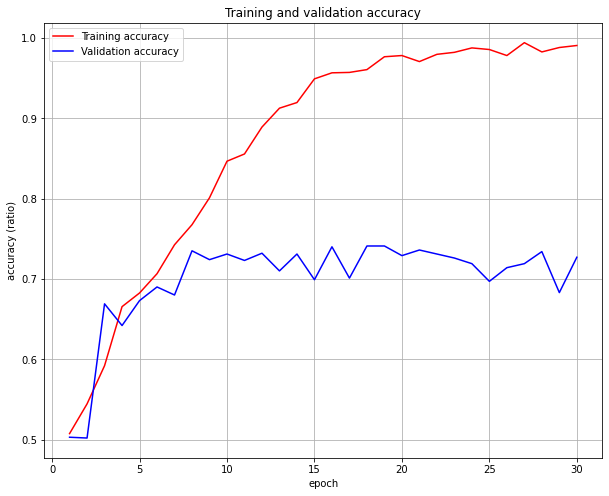

In [21]:
# plot training and validation accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy (ratio)')
plt.legend();

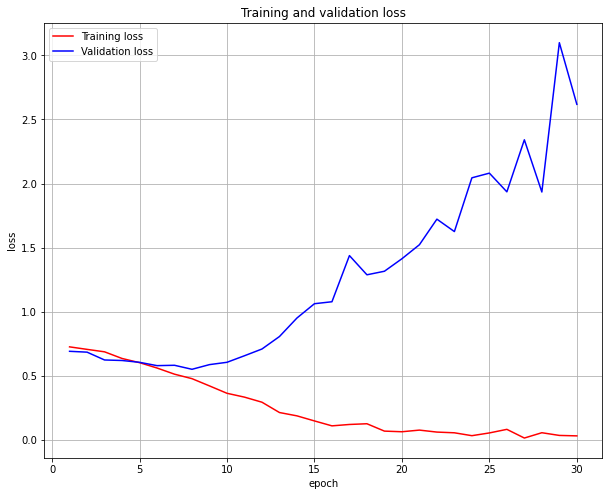

In [22]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

Check the accuracy on the test data.

In [23]:
test_model = keras.models.load_model("../models/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.5f}")

63/63 [==============================] - 3s 50ms/step - loss: 0.6133 - accuracy: 0.7000
Test accuracy: 0.70000


## 8.2.5 Using data augmentation

Overfitting is caused by having too few samples to learn from.  There are methods to try and fight overfitting,
especially regularization methods.  For image classification tasks, another technique that can be useful
is data augmentation.  Other types of data can be more difficult to augment successfully.  But there are
many simple transformations of image data that create a new unique input, but don't change the category
of the image.  We can do things like flip or mirror the image, and rototate it a few degrees.  Also we can
shift it left, right or up down some pixels.  All of these types of transformations results in a new image
that will still have the same category, but will be different enough to help our model to train and better
extract patterns.


In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

You can look at the textbook for more details about all of the specified possible manipulations.  As you can
see from the parameter names, things like rotation, shifting horizontally and vertically, zooming and flipping
can all be done by this data generator.  Whenever you ask the generator to generate some more data, it will
apply one or more of these manipulations randomly to generate a new image to be used for training.

We can use the generator to see the augmented images it generates.


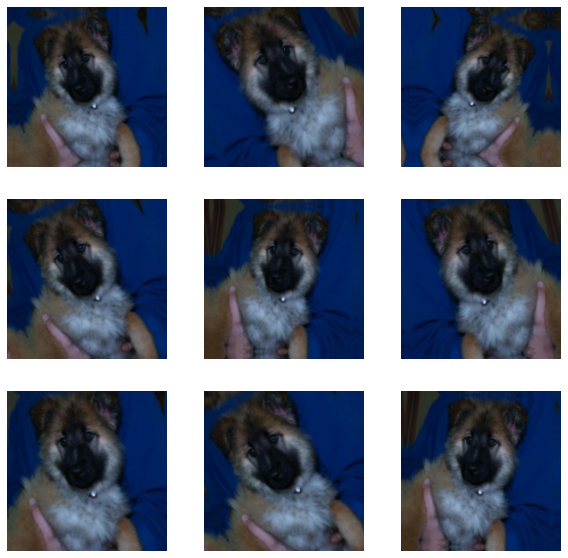

In [25]:
plt.figure(figsize=(10,10))

for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [27]:
model.compile(loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="../models/convnet_from_scratch_with_augmentation.keras",
    save_best_only=True,
    monitor="val_loss")
]


In [29]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=100,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 10s 147ms/step - loss: 0.7404 - accuracy: 0.5020 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 9s 149ms/step - loss: 0.7034 - accuracy: 0.5170 - val_loss: 0.6911 - val_accuracy: 0.5020
Epoch 3/100
63/63 [==============================] - 10s 153ms/step - loss: 0.6975 - accuracy: 0.5500 - val_loss: 0.6833 - val_accuracy: 0.5450
Epoch 4/100
63/63 [==============================] - 10s 153ms/step - loss: 0.6826 - accuracy: 0.6005 - val_loss: 0.6594 - val_accuracy: 0.5870
Epoch 5/100
63/63 [==============================] - 10s 152ms/step - loss: 0.6547 - accuracy: 0.6225 - val_loss: 0.6632 - val_accuracy: 0.5900
Epoch 6/100
63/63 [==============================] - 10s 153ms/step - loss: 0.6349 - accuracy: 0.6425 - val_loss: 0.6163 - val_accuracy: 0.6650
Epoch 7/100
63/63 [==============================] - 10s 153ms/step - loss: 0.6572 - accuracy: 0.6505 - val_loss: 0.6293 - val_accuracy: 

And as before lets plot the accuracy and loss for both our augmented training data and for our
validation data set.

In [30]:
#extract history accuracy and loss data from history to plot
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

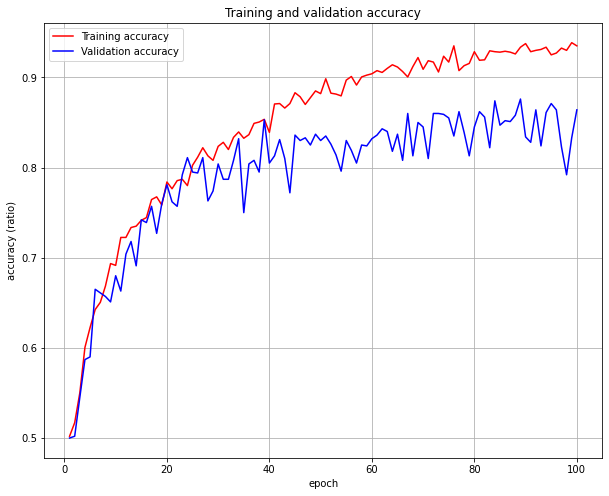

In [31]:
# plot training and validation accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy (ratio)')
plt.legend();

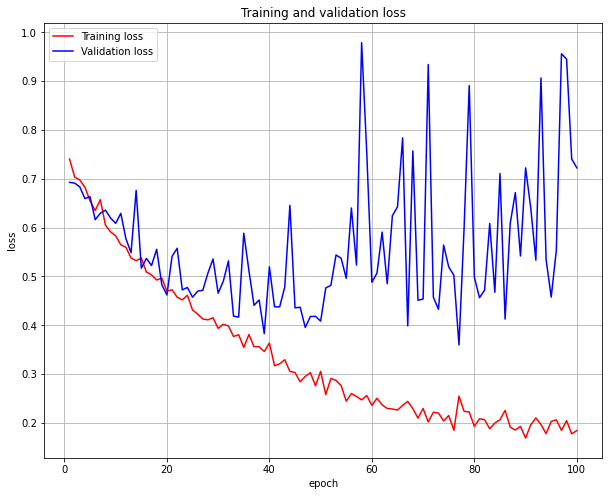

In [32]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

You should see a significant improvement this time, and overfitting should not look like such a problem
with this run.  Through the use of data augmentation, and also adding in a dropout layer to provide
some regularization we have eliminated the overfitting, and through 100 epochs the training and validation
accuracy remain comparable.  Also it looks like accuracy is still increasing and loss decreasing, so we could
potentially to train futhre to get some more improvements.  But you should reach a validation accuracy of 0.82
or better with this model and data augmentation.

And lets check the accuracy of this augmented model on the test data.

In [33]:
test_model = keras.models.load_model(
    "../models/convnet_from_scratch_with_augmentation.keras")

test_loss, test_acc = test_model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 48ms/step - loss: 0.5012 - accuracy: 0.8400
Test accuracy: 0.840
